<a href="https://www.kaggle.com/code/hawonna1997/prediction-of-prices-by-hourly-data?scriptVersionId=196728236" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 4.5 MB/s eta 0:00:00


In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138888 sha256=ae0934ecc73f901a62dd38f670a091f4bcfe41d8099ff132eac8dd03a1faa0c3
  Stored in directory: /root/.cache/pip/wheels/dd/16/8f/bdde4dfda69996dc9e226111ccfd4a4d247cb61b42a237c3cc
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uni

In [3]:
import yfinance as yf
import datetime
import pandas as pd

tickers = ['^GSPC', '^IXIC','^KS200', '^N225', '^GDAXI']

hourly_signal = {}
daily_signal = {}

for ticker in tickers:

    net = yf.Ticker(ticker)

    now = datetime.datetime.now()
    substract_days = datetime.timedelta(days=250)
    n_days_ago = now - substract_days    
    pred_start = pd.to_datetime(n_days_ago)
    pred_end = pd.to_datetime(now)

    start_date, end_date = pred_start, pred_end
    daily_signals_df = net.history(start=start_date, end=end_date, interval='1d', back_adjust=True, auto_adjust=True, prepost=False)
    hourly_signals_df = net.history(start=start_date, end=end_date, interval='1h', back_adjust=True, auto_adjust=True, prepost=True)
    
    daily_signal[ticker] = daily_signals_df['Close']
    hourly_signal[ticker] = hourly_signals_df['Close']

In [4]:
def get_df (name = '^GSPC'):
    df = pd.DataFrame(hourly_signal[name])
    df.columns = ['Close']
    return df

tickers = ['^GSPC', '^IXIC','^KS200', '^N225', '^GDAXI']

df_list = []
for ticker in tickers:
    df = get_df(ticker)
    df_list.append(df)

SP500 = df_list[0]
NASDAQ = df_list[1]
KS200 = df_list[2]
NI = df_list[3]
DAX = df_list[4]

SP500

,Close
Datetime,
2024-01-09 09:30:00-05:00,4742.029785
2024-01-09 10:30:00-05:00,4749.799805
2024-01-09 11:30:00-05:00,4758.859863
2024-01-09 12:30:00-05:00,4755.279785
2024-01-09 13:30:00-05:00,4752.899902
...,...
2024-09-13 11:30:00-04:00,5622.060059
2024-09-13 12:30:00-04:00,5633.830078
2024-09-13 13:30:00-04:00,5620.850098


In [5]:
IDX_list = [SP500, NASDAQ, KS200, NI, DAX]
name_list = ['SP500', 'NASDAQ', 'KS200', 'NI', 'DAX']

for idx, name in zip (IDX_list, name_list):
    print(name +' : ' + str(idx.shape))

SP500 : (1501, 1)
NASDAQ : (1544, 1)
KS200 : (1190, 1)
NI : (1026, 1)
DAX : (1760, 1)


In [6]:
SP500

,Close
Datetime,
2024-01-09 09:30:00-05:00,4742.029785
2024-01-09 10:30:00-05:00,4749.799805
2024-01-09 11:30:00-05:00,4758.859863
2024-01-09 12:30:00-05:00,4755.279785
2024-01-09 13:30:00-05:00,4752.899902
...,...
2024-09-13 11:30:00-04:00,5622.060059
2024-09-13 12:30:00-04:00,5633.830078
2024-09-13 13:30:00-04:00,5620.850098


In [7]:
SP500[SP500.index < '2021-09-19']

,Close
Datetime,


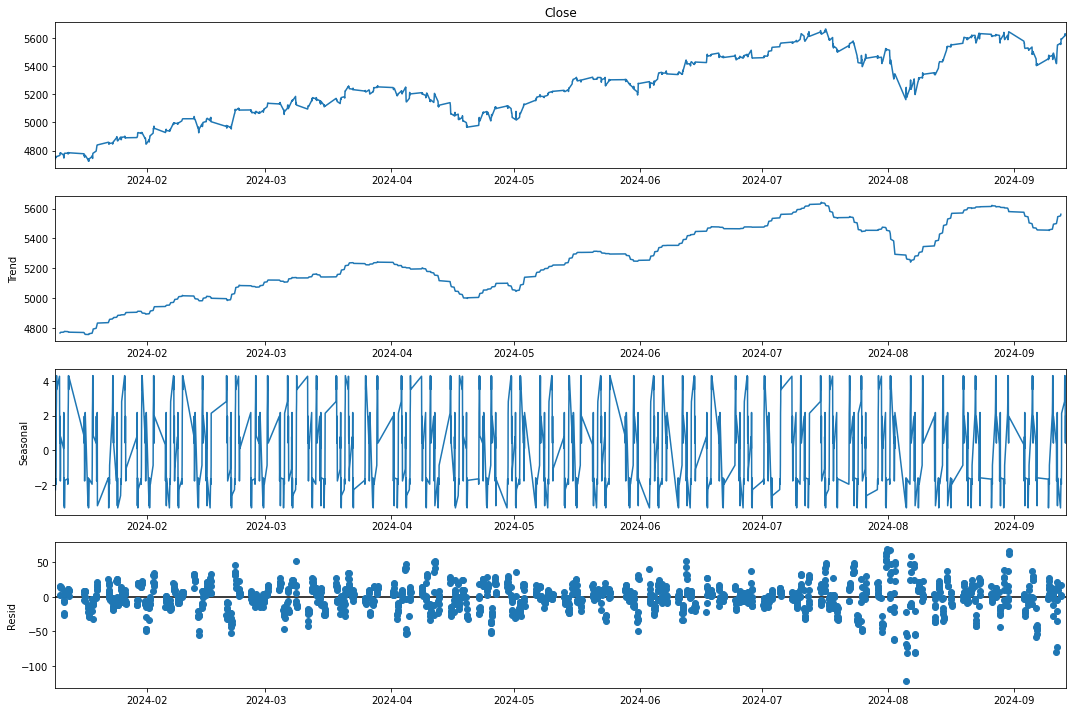

In [8]:
import statsmodels.api as sm
decomp_viz = sm.tsa.seasonal_decompose(SP500['Close'], period=24)
fig= decomp_viz.plot()
fig.set_size_inches((15,10))
fig.tight_layout()

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class MA(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,x,y):
        return self
    def transform(self,x):
        x['MA6'] = x['Close'].rolling(window=6).mean() #6시간
        x['MA12'] = x['Close'].rolling(window=12).mean() #12시간
        x['MA24'] = x['Close'].rolling(window=24).mean() #24시간
        x['MA48'] = x['Close'].rolling(window=48).mean() #48시간평균
        return x

In [10]:
from sklearn.pipeline import Pipeline 

data_pipeline = Pipeline([
    ('MA',MA())])
SP500_ma = data_pipeline.transform(SP500)

In [11]:
SP500_ma = SP500_ma.dropna()

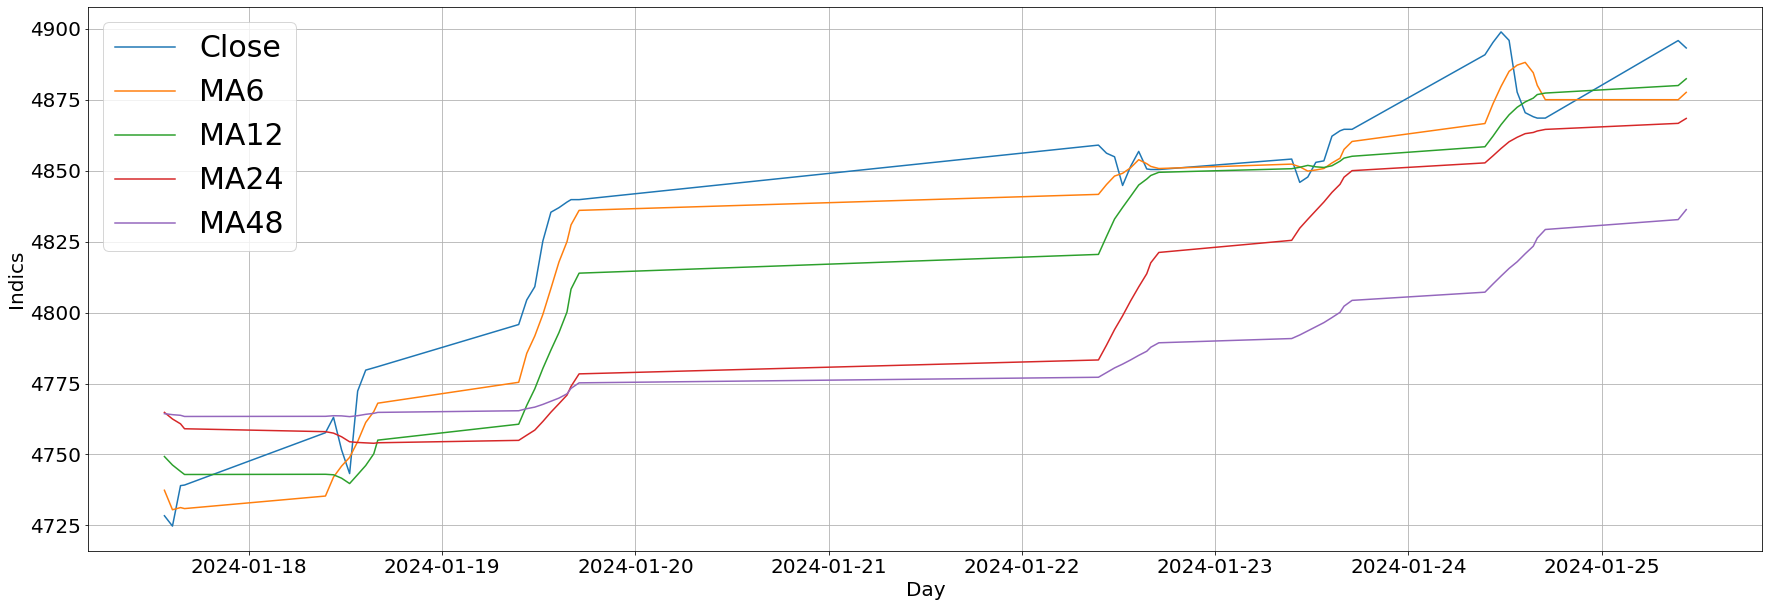

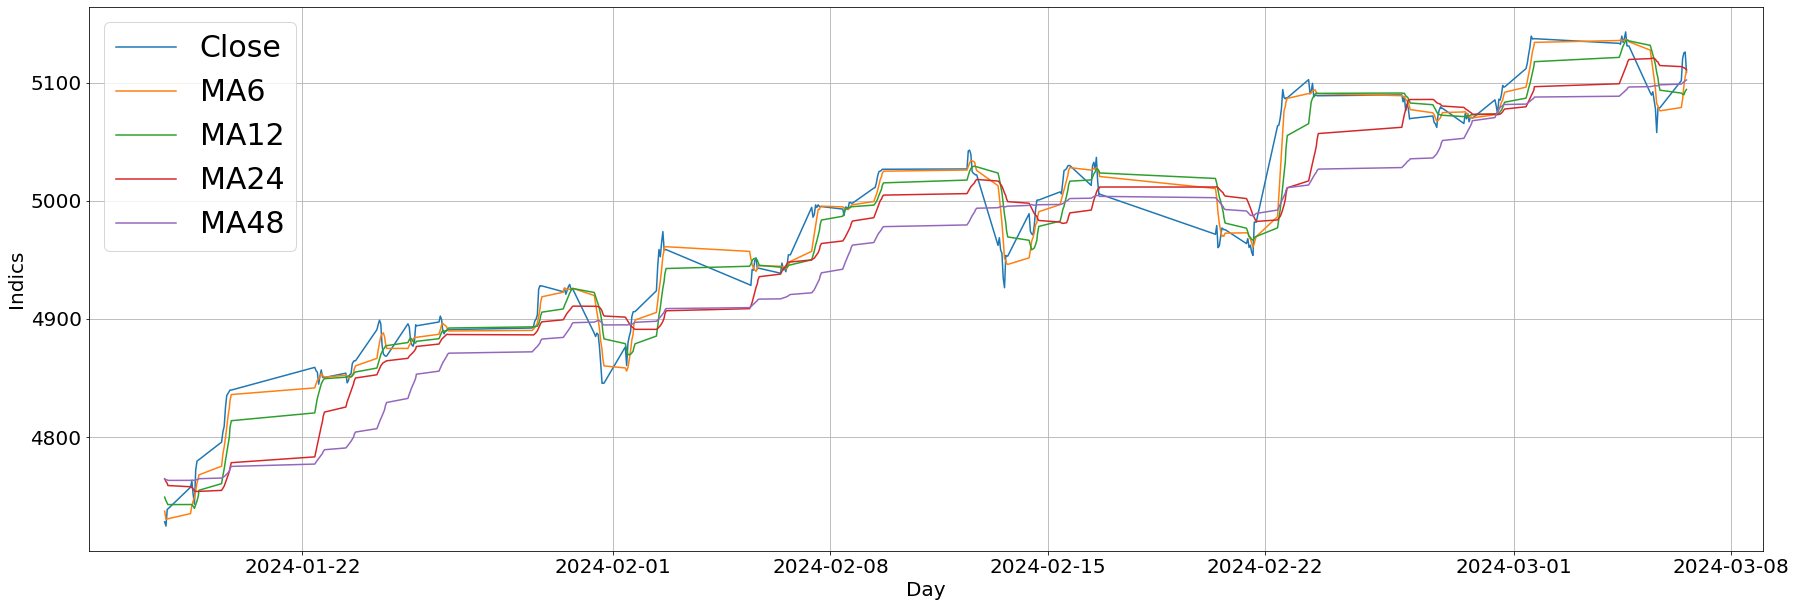

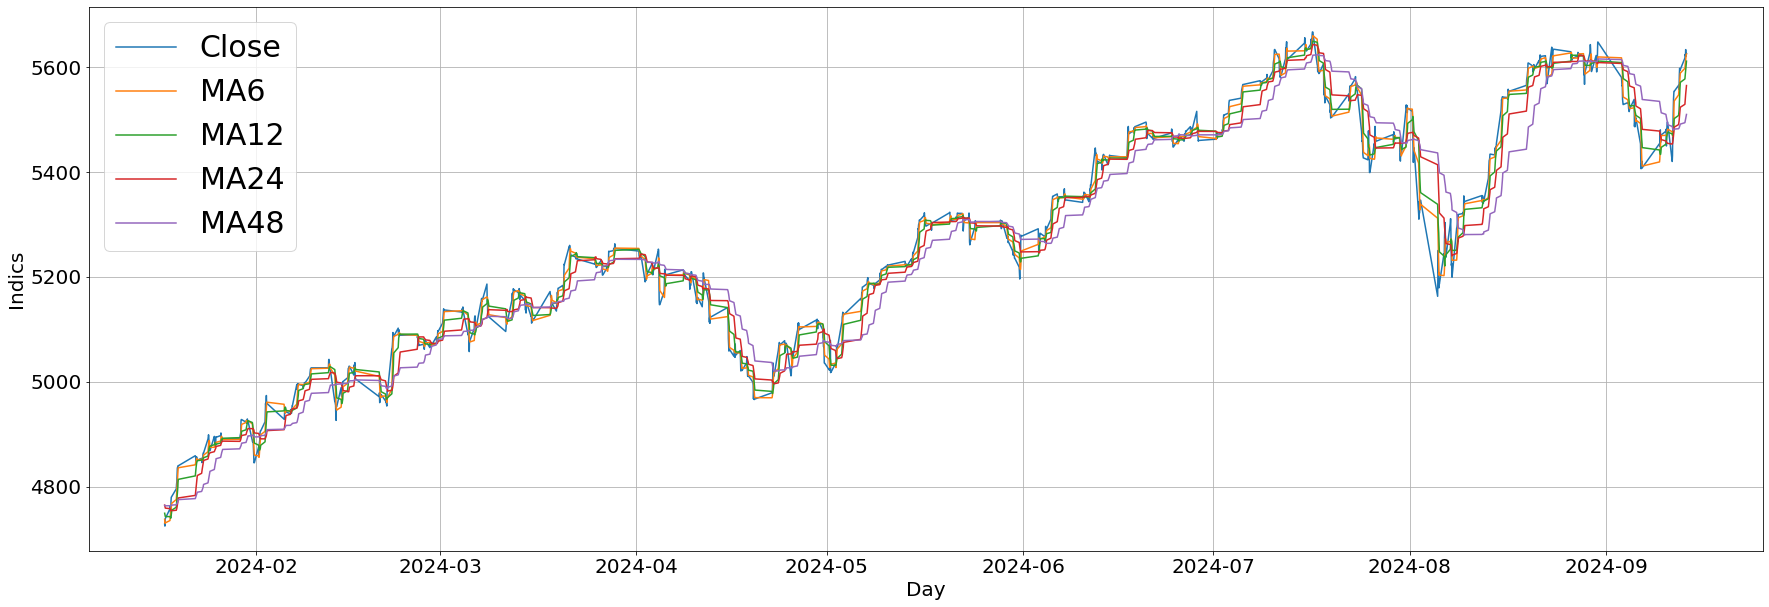

In [12]:
import matplotlib.pyplot as plt

def plot_MA(data): #이동평균 표현 
    %matplotlib inline
    plt.figure(figsize=(30,10))
    plt.rc('font',size=20)
    plt.plot(data['Close'],label='Close')
    plt.plot(data['MA6'],label='MA6',)
    plt.plot(data['MA12'],label='MA12')
    plt.plot(data['MA24'],label='MA24')
    plt.plot(data['MA48'],label='MA48')
    plt.xlabel('Day')
    plt.ylabel('Indics')
    plt.legend(fontsize=30)
    plt.grid(True)
    return plt.show()

plot_MA(SP500_ma[:50])
plot_MA(SP500_ma[:300])
plot_MA(SP500_ma)



<AxesSubplot:title={'center':'KS200'}, xlabel='Datetime'>

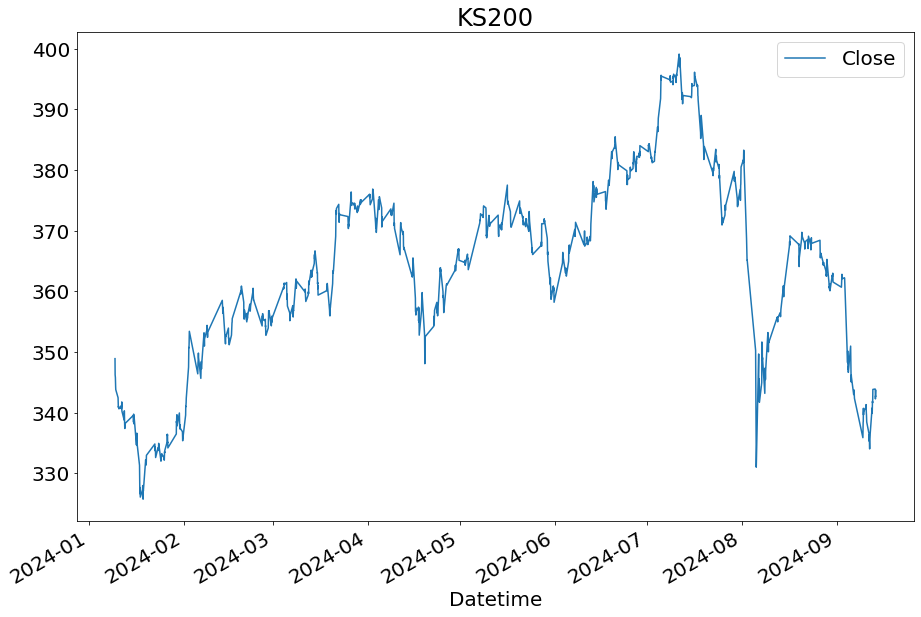

In [13]:
KS200.plot.line(figsize=(15,10), title='KS200')


<AxesSubplot:title={'center':'SP500'}, xlabel='Datetime'>

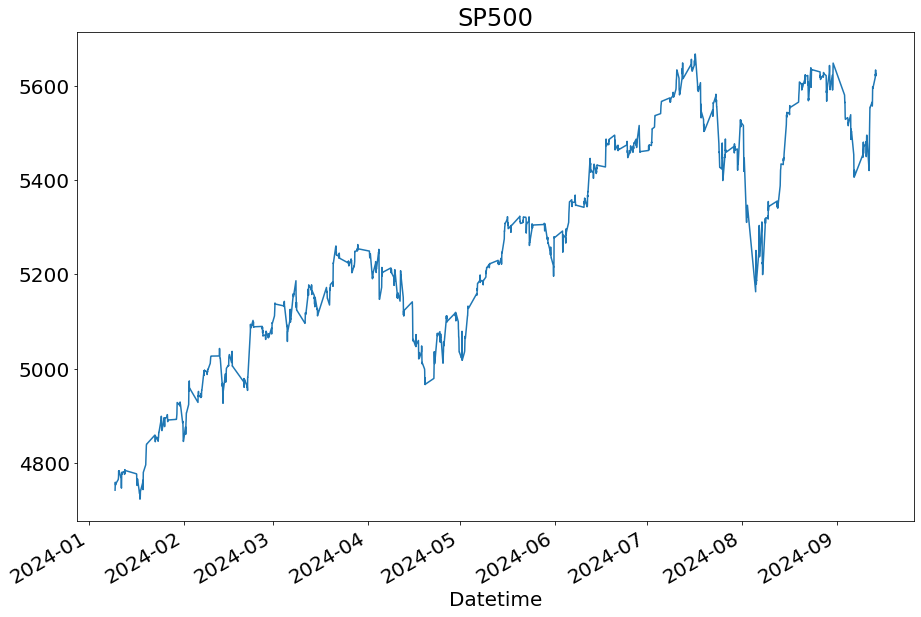

In [14]:
SP500.Close.plot.line(figsize=(15,10), title='SP500')


<AxesSubplot:title={'center':'NASDAQ'}, xlabel='Datetime'>

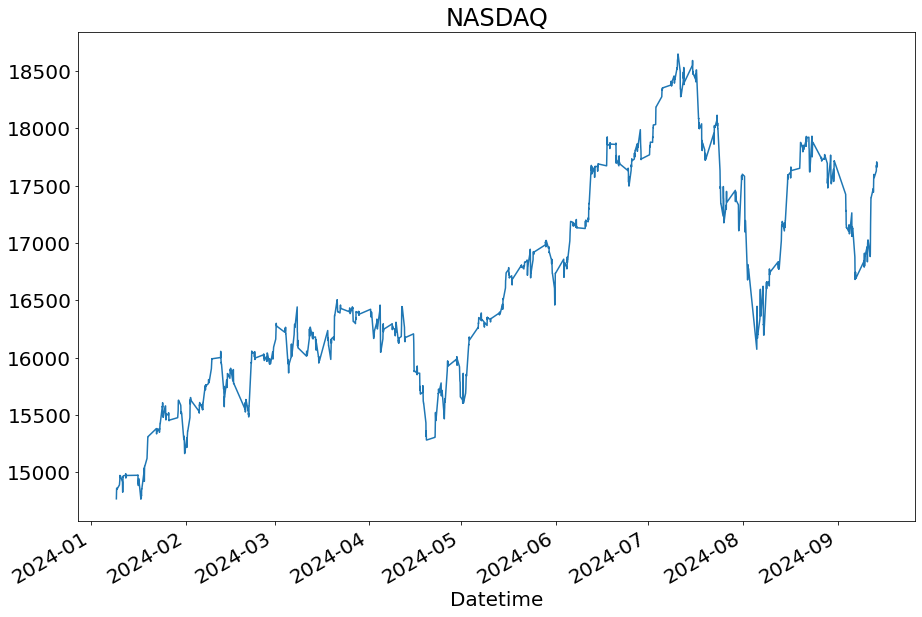

In [15]:
NASDAQ.Close.plot.line(figsize=(15,10), title='NASDAQ')


<AxesSubplot:title={'center':'DAX'}, xlabel='Datetime'>

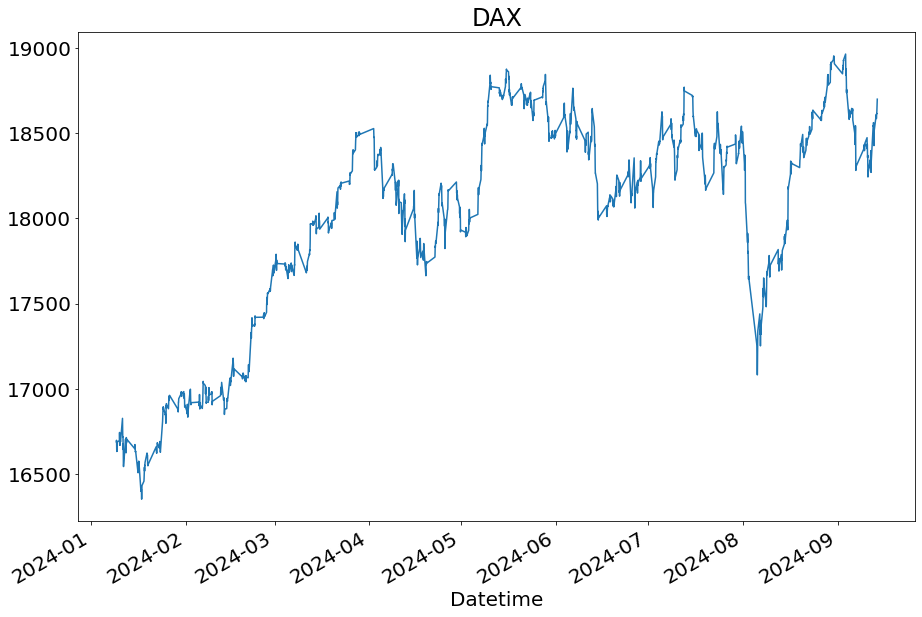

In [16]:
DAX.Close.plot.line(figsize=(15,10), title='DAX')


In [17]:
import numpy as np

def get_train_test (df=DAX, name='DAX'):
    df_train,df_test = df.iloc[:-9*5-1].to_numpy(),df.iloc[-9*5-1:].to_numpy()
    
#     df_train = np.array(df_train).reshape(-1,1)
#     df_test = df.Close[int(df.Close.shape[0]*0.7):]
#     df_test = np.array(df_test).reshape(-1,1)
    print (name + f'_train_shape: {df_train.shape}')
    print (name + f'_test_shape: {df_test.shape}')       
    return df_train, df_test 

DAX_train, DAX_test = get_train_test (df=DAX, name='DAX')
SP500_train, SP500_test = get_train_test (df=SP500, name='SP500')
NASDAQ_train, NASDAQ_test = get_train_test (df=NASDAQ, name='NASDAQ')
KS200_train, KS200_test = get_train_test (df=KS200, name='KS200')
NI_train, NI_test = get_train_test (df=NI, name='NI')


DAX_train_shape: (1714, 1)
DAX_test_shape: (46, 1)
SP500_train_shape: (1455, 5)
SP500_test_shape: (46, 5)
NASDAQ_train_shape: (1498, 1)
NASDAQ_test_shape: (46, 1)
KS200_train_shape: (1144, 1)
KS200_test_shape: (46, 1)
NI_train_shape: (980, 1)
NI_test_shape: (46, 1)


# DAX로 진행

In [18]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

DAX_train, DAX_test = scaler.fit_transform(DAX_train), scaler.fit_transform(DAX_test)

In [19]:
def make_DL_dataset (train, input_window_size=9):
  
  feature_list = []
  label_list = []

  for i in range(len(train) - input_window_size*2): 
      feature_list.append(train[i:i+input_window_size]) #9시간
      label_list.append(train[i+input_window_size:i+input_window_size*2]) #다음날 9시간
  return feature_list, label_list
  

X_train_DAX, y_train_DAX= make_DL_dataset (DAX_train)
X_test_DAX, y_test_DAX = make_DL_dataset (DAX_test)

In [20]:
X_train_DAX = np.array(X_train_DAX)
y_train_DAX = np.array(X_train_DAX)
X_test_DAX = np.array(X_test_DAX)
y_test_DAX = np.array(X_test_DAX)

In [21]:
print(type(X_train_DAX))
print('X_train shape:{}'.format(X_train_DAX.shape))
print('Y_train shape:{}'.format(y_train_DAX.shape))
print('X_test shape:{}'.format(X_test_DAX.shape))
print('Y_test shape:{}'.format(y_test_DAX.shape))

#print(y_train_DAX[0])
# pd.DataFrame(y_test_DAX).plot()

<class 'numpy.ndarray'>
X_train shape:(1696, 9, 1)
Y_train shape:(1696, 9, 1)
X_test shape:(28, 9, 1)
Y_test shape:(28, 9, 1)


# Dataset to Tensor

In [22]:
import torch 
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.utils.data import ConcatDataset

def get_tensor_Dataset(X_train=X_train_DAX, y_train=y_train_DAX, X_test=X_test_DAX, y_test=y_test_DAX):
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)
    Dataset_train = TensorDataset(X_train_tensor, y_train_tensor)

    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test)
    Dataset_test = TensorDataset(X_test_tensor, y_test_tensor)
    
    return Dataset_train, Dataset_test

Dataset_train_DAX, Dataset_test_DAX = get_tensor_Dataset(X_train_DAX, y_train_DAX, X_test_DAX, y_test_DAX)

In [23]:
Dataset_test_DAX.tensors[0]

tensor([[[-0.1528],
         [-0.1322],
         [-0.1220],
         [ 0.0244],
         [-0.0198],
         [ 0.0101],
         [ 0.0701],
         [ 0.2132],
         [-0.0961]],

        [[-0.1322],
         [-0.1220],
         [ 0.0244],
         [-0.0198],
         [ 0.0101],
         [ 0.0701],
         [ 0.2132],
         [-0.0961],
         [ 0.0232]],

        [[-0.1220],
         [ 0.0244],
         [-0.0198],
         [ 0.0101],
         [ 0.0701],
         [ 0.2132],
         [-0.0961],
         [ 0.0232],
         [-0.1932]],

        [[ 0.0244],
         [-0.0198],
         [ 0.0101],
         [ 0.0701],
         [ 0.2132],
         [-0.0961],
         [ 0.0232],
         [-0.1932],
         [-0.3469]],

        [[-0.0198],
         [ 0.0101],
         [ 0.0701],
         [ 0.2132],
         [-0.0961],
         [ 0.0232],
         [-0.1932],
         [-0.3469],
         [-0.2850]],

        [[ 0.0101],
         [ 0.0701],
         [ 0.2132],
         [-0.0961],
         [

## Dataload

In [24]:
def get_Dataloader(Dataset, batch_size=128):
  
  Dataloader= torch.utils.data.DataLoader(Dataset, batch_size=batch_size, shuffle=True, num_workers=0) # 텐서화된 X_train과 y_train을 batch_size로 잘라 돌려줌
  
  return Dataloader 



Dataloader_train_DAX = get_Dataloader (Dataset_train_DAX, 128)
Dataloader_test_DAX = get_Dataloader (Dataset_test_DAX, 128)
# Dataloader_valid_DAX = get_Dataloader (Dataset_valid=Dataset_valid_DAX, batch_size=128)

In [25]:
is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [26]:
import torch.nn as nn

# weight, bias 초기화 

def weight_init (submodule):
    if isinstance(submodule, torch.nn.Conv1d):
        torch.nn.init.kaiming_normal(submodule.weight)
        submodule.bias.data.fill_(0.01)
    elif isinstance(submodule, torch.nn.Linear or nn.LSTM):
        torch.nn.init.xavier_normal(submodule.weight)
        submodule.bias.data.fill_(0.01)


class Model(nn.Module):
    def __init__(self, num_layer=1, p=0.25):
        super(Model, self).__init__()
        self.num_layer = num_layer
        self.p = p
        self.con_layer = nn.Sequential(
            nn.Conv1d(9,1024,1), #expect 24 channel 
            nn.BatchNorm1d(1024),
            nn.Hardswish(),
#             nn.Dropout(p=p),

            nn.Conv1d(1024,512,1),
            nn.BatchNorm1d(512),
            nn.Hardswish(),
            #             nn.Dropout(p=p),

            nn.Conv1d(512,256,1),
            nn.BatchNorm1d(256),
            nn.Hardswish(),
#             nn.Dropout(p=p),

            nn.Conv1d(256,128,1),
            nn.BatchNorm1d(128),
            nn.Hardswish(),
#             nn.Dropout(p=p)
            )

        self.lstm1 =torch.nn.LSTM(1,128,num_layers=num_layer)
        self.dropout = nn.Dropout(p=p)


#         self.lstm2 =nn.LSTM(512,1024,batch_first=True, num_layers= num_layers)
#         self.tanh2 = nn.Tanh()
#         self.dropout = nn.Dropout(p=p)

#         self.lstm3 =nn.LSTM(1024,512,batch_first=True, num_layers= num_layers)
#         self.tanh3 = nn.Tanh()
#         self.dropout = nn.Dropout(p=p)

#         self.lstm4 =nn.LSTM(512,256,batch_first=True, num_layers= num_layers)
#         self.tanh4 = nn.Tanh()
#         self.dropout = nn.Dropout(p=p)

    #중요 
        self.flatten = nn.Flatten()

        self.linear_layer = nn.Sequential(
            nn.Linear(128, 1))

    def forward(self, input,target,output_window,tf_ratio):
        batch_size = input.shape[0]
        input_size = input.shape[2]
        
        outputs = torch.zeros(batch_size,output_window,input_size)
#         print(outputs)
        conv_output = self.con_layer(input).permute(0,2,1)
        decoder_input = input[:,-1,:]
        for t in range(output_window):
            output, hidden = self.lstm1(decoder_input,conv_output)
            output = output.squeeze(1)
            output = self.linear_layer(output)
            
            if torch.rand(1) < tf_ratio:
                decoder_input = target[:,t,:]
            else:
                decoder_input = output
            outputs[:,t,:] = output
        return outputs
    def predict(self, inputs,target ,output_window):    
        self.eval()
        batch_size = inputs.shape[0]
        input_size = inputs.shape[2]
        outputs = torch.zeros(batch_size, output_window, input_size)
        conv_output = self.con_layer(inputs).permute(0,2,1)
        decoder_input = inputs[:,-1,:]
        for t in range(output_window): 
            out, hidden = self.lstm1(decoder_input, conv_output)
            out =  out.squeeze(1)
            out = self.linear_layer(out)
            decoder_input = out
            outputs[:,t,:] = out
        return outputs.detach().cpu().numpy()[0,:,0]

In [27]:
import warnings
warnings.filterwarnings(action='ignore')

In [28]:
lr = 3e-4
epochs = 100

In [29]:
from tqdm import tqdm
from torch import optim
import torch.nn.functional as F
from tqdm import tqdm 
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

kfold = KFold(n_splits=10, shuffle=False)
for fold, (train_idx, valid_idx) in enumerate(kfold.split(Dataset_train_DAX)):
    if fold == 8:
        print(f'FOLD {fold}')
        print('-'*50)
      # index 가져오기 
        train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx) 
        valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_idx) 
        # trainloader, validloader 선언 
        train_loader = torch.utils.data.DataLoader(Dataset_train_DAX, batch_size=128, sampler=train_subsampler,drop_last=False)
        valid_loader = torch.utils.data.DataLoader(Dataset_train_DAX, batch_size=128, sampler=valid_subsampler,drop_last=False)
        model = Model(p=0.5) 
        model.apply(weight_init)
        device = ('cuda' if torch.cuda.is_available() else 'cpu')
        model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        train_loss = []
        valid_loss = []
        min_loss = np.Inf
        
        for e in range(epochs):
            model.train()
            tqdm_train = tqdm(train_loader)
            for x,y in tqdm_train:
                x,y = x.to(device).float(),y.to(device).float()

                optimizer.zero_grad()
                logits = model(x,y,9,0.5).to(device)
                loss = F.smooth_l1_loss(logits,y)
                loss.backward()
                optimizer.step()

                loss = loss.detach().cpu().numpy()
            train_loss.append(np.mean(loss))
            model.eval()
            with torch.no_grad():
                tqdm_dataloader_valid = tqdm(valid_loader) 
                for X_valid, y_valid in tqdm_dataloader_valid:

                    X_valid, y_valid = X_valid.to(device), y_valid.to(device)
                    pred = model(X_valid,y_valid,9,0.5).to(device)
                    loss = F.smooth_l1_loss(pred, y_valid)

                    loss = loss.detach().cpu().numpy()
            valid_loss.append(np.mean(loss))


            print('Epoch:{}\tTrain Loss:{:.5f}\tValid Loss:{:.5f}'.format(e+1,train_loss[e],valid_loss[e]))
            if valid_loss[e] < min_loss:
                print('Loss decreased {:.5f} ---> {:.5f} so saving the model'.format(min_loss,valid_loss[e]))
                torch.save(model.state_dict(),f'seq2seq_{fold}.pt')
                min_loss = valid_loss[e]
                patience = 0
            else:
                patience += 1
                print(f'patience:{patience}')
                if patience == 15:
                    print(f'Best loss:{min_loss}')
                    break


FOLD 8
--------------------------------------------------


100%|██████████| 2/2 [00:00<00:00, 68.57it/s]


Epoch:1	Train Loss:0.30122	Valid Loss:0.14778
Loss decreased inf ---> 0.14778 so saving the model


100%|██████████| 2/2 [00:00<00:00, 69.40it/s]


Epoch:2	Train Loss:0.32576	Valid Loss:0.14028
Loss decreased 0.14778 ---> 0.14028 so saving the model


100%|██████████| 2/2 [00:00<00:00, 71.56it/s]


Epoch:3	Train Loss:0.30324	Valid Loss:0.13288
Loss decreased 0.14028 ---> 0.13288 so saving the model


100%|██████████| 2/2 [00:00<00:00, 73.71it/s]


Epoch:4	Train Loss:0.29851	Valid Loss:0.14145
patience:1


100%|██████████| 2/2 [00:00<00:00, 70.82it/s]


Epoch:5	Train Loss:0.26889	Valid Loss:0.11741
Loss decreased 0.13288 ---> 0.11741 so saving the model


100%|██████████| 2/2 [00:00<00:00, 67.46it/s]


Epoch:6	Train Loss:0.30193	Valid Loss:0.13280
patience:1


100%|██████████| 2/2 [00:00<00:00, 60.50it/s]


Epoch:7	Train Loss:0.26485	Valid Loss:0.11042
Loss decreased 0.11741 ---> 0.11042 so saving the model


100%|██████████| 2/2 [00:00<00:00, 58.96it/s]


Epoch:8	Train Loss:0.26483	Valid Loss:0.11081
patience:1


100%|██████████| 2/2 [00:00<00:00, 71.01it/s]


Epoch:9	Train Loss:0.18620	Valid Loss:0.10232
Loss decreased 0.11042 ---> 0.10232 so saving the model


100%|██████████| 2/2 [00:00<00:00, 73.91it/s]


Epoch:10	Train Loss:0.19939	Valid Loss:0.11196
patience:1


100%|██████████| 2/2 [00:00<00:00, 68.66it/s]


Epoch:11	Train Loss:0.18048	Valid Loss:0.05617
Loss decreased 0.10232 ---> 0.05617 so saving the model


100%|██████████| 2/2 [00:00<00:00, 69.54it/s]


Epoch:12	Train Loss:0.09937	Valid Loss:0.09105
patience:1


100%|██████████| 2/2 [00:00<00:00, 71.11it/s]


Epoch:13	Train Loss:0.06297	Valid Loss:0.05007
Loss decreased 0.05617 ---> 0.05007 so saving the model


100%|██████████| 2/2 [00:00<00:00, 70.12it/s]


Epoch:14	Train Loss:0.04700	Valid Loss:0.04256
Loss decreased 0.05007 ---> 0.04256 so saving the model


100%|██████████| 2/2 [00:00<00:00, 71.15it/s]


Epoch:15	Train Loss:0.04340	Valid Loss:0.02655
Loss decreased 0.04256 ---> 0.02655 so saving the model


100%|██████████| 2/2 [00:00<00:00, 72.86it/s]


Epoch:16	Train Loss:0.01129	Valid Loss:0.01739
Loss decreased 0.02655 ---> 0.01739 so saving the model


100%|██████████| 2/2 [00:00<00:00, 65.29it/s]


Epoch:17	Train Loss:0.01768	Valid Loss:0.02066
patience:1


100%|██████████| 2/2 [00:00<00:00, 70.72it/s]


Epoch:18	Train Loss:0.00836	Valid Loss:0.01062
Loss decreased 0.01739 ---> 0.01062 so saving the model


100%|██████████| 2/2 [00:00<00:00, 71.95it/s]


Epoch:19	Train Loss:0.00688	Valid Loss:0.00971
Loss decreased 0.01062 ---> 0.00971 so saving the model


100%|██████████| 2/2 [00:00<00:00, 60.87it/s]


Epoch:20	Train Loss:0.00768	Valid Loss:0.02068
patience:1


100%|██████████| 2/2 [00:00<00:00, 68.23it/s]


Epoch:21	Train Loss:0.00518	Valid Loss:0.03021
patience:2


100%|██████████| 2/2 [00:00<00:00, 69.78it/s]


Epoch:22	Train Loss:0.00916	Valid Loss:0.00985
patience:3


100%|██████████| 2/2 [00:00<00:00, 67.52it/s]


Epoch:23	Train Loss:0.01786	Valid Loss:0.01136
patience:4


100%|██████████| 2/2 [00:00<00:00, 66.73it/s]


Epoch:24	Train Loss:0.00752	Valid Loss:0.04122
patience:5


100%|██████████| 2/2 [00:00<00:00, 66.03it/s]


Epoch:25	Train Loss:0.04464	Valid Loss:0.01453
patience:6


100%|██████████| 2/2 [00:00<00:00, 69.92it/s]


Epoch:26	Train Loss:0.00759	Valid Loss:0.01220
patience:7


100%|██████████| 2/2 [00:00<00:00, 72.60it/s]


Epoch:27	Train Loss:0.02092	Valid Loss:0.01241
patience:8


100%|██████████| 2/2 [00:00<00:00, 67.45it/s]


Epoch:28	Train Loss:0.00681	Valid Loss:0.01343
patience:9


100%|██████████| 2/2 [00:00<00:00, 70.81it/s]


Epoch:29	Train Loss:0.00566	Valid Loss:0.00843
Loss decreased 0.00971 ---> 0.00843 so saving the model


100%|██████████| 2/2 [00:00<00:00, 70.48it/s]


Epoch:30	Train Loss:0.00473	Valid Loss:0.01068
patience:1


100%|██████████| 2/2 [00:00<00:00, 69.27it/s]


Epoch:31	Train Loss:0.00766	Valid Loss:0.01097
patience:2


100%|██████████| 2/2 [00:00<00:00, 69.38it/s]


Epoch:32	Train Loss:0.00331	Valid Loss:0.01424
patience:3


100%|██████████| 2/2 [00:00<00:00, 67.74it/s]


Epoch:33	Train Loss:0.00459	Valid Loss:0.00794
Loss decreased 0.00843 ---> 0.00794 so saving the model


100%|██████████| 2/2 [00:00<00:00, 73.19it/s]


Epoch:34	Train Loss:0.00818	Valid Loss:0.00534
Loss decreased 0.00794 ---> 0.00534 so saving the model


100%|██████████| 2/2 [00:00<00:00, 71.71it/s]


Epoch:35	Train Loss:0.00312	Valid Loss:0.01048
patience:1


100%|██████████| 2/2 [00:00<00:00, 56.58it/s]


Epoch:36	Train Loss:0.00816	Valid Loss:0.00993
patience:2


100%|██████████| 2/2 [00:00<00:00, 71.27it/s]


Epoch:37	Train Loss:0.00294	Valid Loss:0.01249
patience:3


100%|██████████| 2/2 [00:00<00:00, 69.05it/s]


Epoch:38	Train Loss:0.00489	Valid Loss:0.01112
patience:4


100%|██████████| 2/2 [00:00<00:00, 68.73it/s]


Epoch:39	Train Loss:0.00329	Valid Loss:0.01614
patience:5


100%|██████████| 2/2 [00:00<00:00, 72.14it/s]


Epoch:40	Train Loss:0.00440	Valid Loss:0.01131
patience:6


100%|██████████| 2/2 [00:00<00:00, 69.41it/s]


Epoch:41	Train Loss:0.00551	Valid Loss:0.01157
patience:7


100%|██████████| 2/2 [00:00<00:00, 73.03it/s]


Epoch:42	Train Loss:0.00306	Valid Loss:0.00649
patience:8


100%|██████████| 2/2 [00:00<00:00, 71.64it/s]


Epoch:43	Train Loss:0.00262	Valid Loss:0.00784
patience:9


100%|██████████| 2/2 [00:00<00:00, 70.84it/s]


Epoch:44	Train Loss:0.00247	Valid Loss:0.00959
patience:10


100%|██████████| 2/2 [00:00<00:00, 69.36it/s]


Epoch:45	Train Loss:0.00989	Valid Loss:0.01002
patience:11


100%|██████████| 2/2 [00:00<00:00, 67.43it/s]


Epoch:46	Train Loss:0.00228	Valid Loss:0.01265
patience:12


100%|██████████| 2/2 [00:00<00:00, 72.87it/s]


Epoch:47	Train Loss:0.00364	Valid Loss:0.01091
patience:13


100%|██████████| 2/2 [00:00<00:00, 58.96it/s]


Epoch:48	Train Loss:0.00310	Valid Loss:0.00915
patience:14


100%|██████████| 2/2 [00:00<00:00, 71.15it/s]

Epoch:49	Train Loss:0.00243	Valid Loss:0.00560
patience:15
Best loss:0.005342797841876745


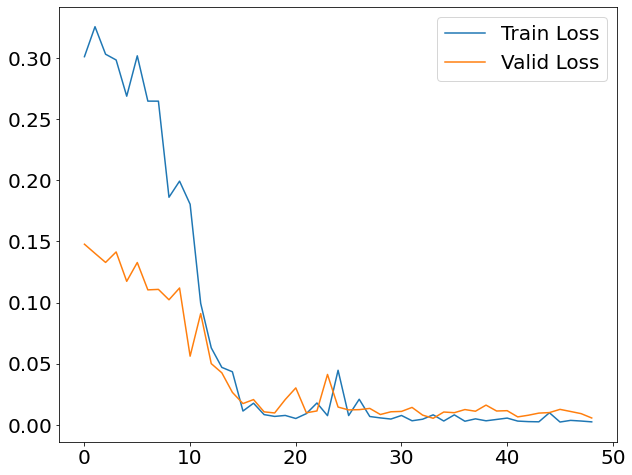

In [30]:
plt.figure(figsize=(10,8))
plt.plot(train_loss,label='Train Loss')
plt.plot(valid_loss,label='Valid Loss')
plt.legend()

In [31]:
len(Dataset_test_DAX)

28

In [32]:
test_loader = DataLoader(Dataset_test_DAX,batch_size=len(Dataset_test_DAX),num_workers=0)

In [33]:
model.load_state_dict(torch.load('./seq2seq_8.pt'))

<All keys matched successfully>

In [34]:
model.eval()
total_pred = []
with torch.no_grad():
    tqdm_dataloader_test = tqdm(test_loader) 
    for X_test, y_test in tqdm_dataloader_test:

        X_test, y_test = X_test.to(device), y_test.to(device)
        pred = model.predict(X_test,y_test,9)
#         total_pred.append(pred)


100%|██████████| 1/1 [00:00<00:00, 109.78it/s]


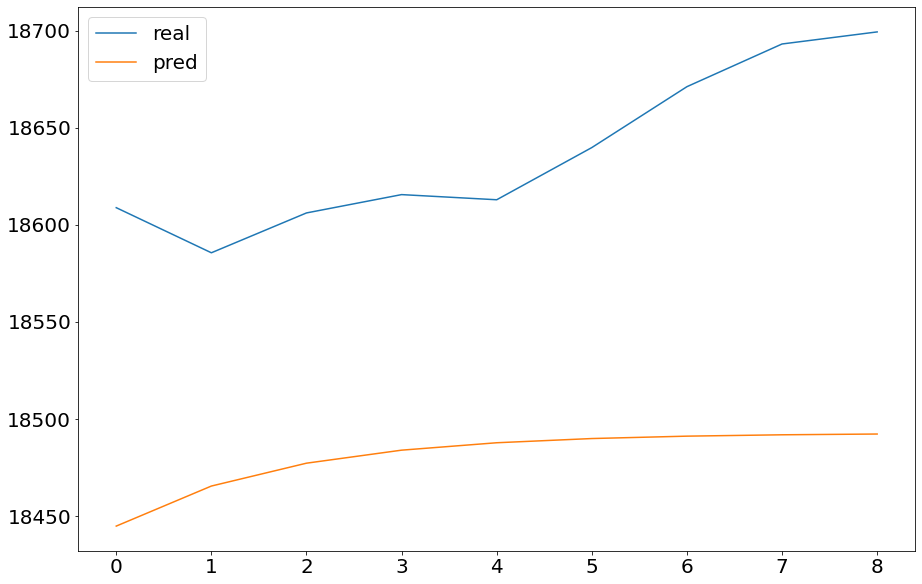

In [35]:
plt.figure(figsize=(15,10))
plt.plot(DAX.Close[-9:].values,label='real')
plt.plot(scaler.inverse_transform(pred.reshape(-1,1)),label='pred')
plt.legend()

In [36]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
rmse = np.sqrt(mean_squared_error(DAX.Close[-9:].values,scaler.inverse_transform(pred.reshape(-1,1))))
print(f'RMSE:{rmse}')

RMSE:159.58607844189063
